# Distributions

## Distributions

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
df = pd.read_csv("./data/2002FemPreg_after_01.csv")
df

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125,3.997283
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750,3.572040
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250,4.139030
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000,3.175147
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875,2.806603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875,2.806603
13589,13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13590,13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13591,13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000,3.401943


This data frame has the last modifications we did at [Exploratory Data Analysis](/notebook.html?src=/notes/think_stats/01_exploratory_data_analysis.ipynb).

Let's create an histogram for the weight distribution.

In [133]:
wgt = df[df["outcome"] == 1]["totalwgt_kg"]
wgt

0        3.997283
1        3.572040
2        4.139030
3        3.175147
4        2.806603
           ...   
13581    2.891651
13584    2.891651
13588    2.806603
13591    3.401943
13592    3.401943
Name: totalwgt_kg, Length: 9148, dtype: float64

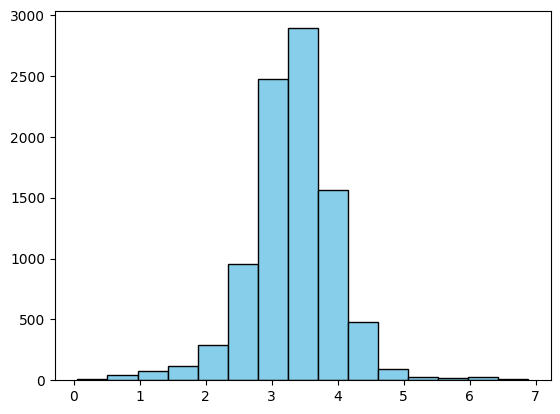

In [134]:
fig, ax = plt.subplots()

ax.hist(wgt, bins=15, color="skyblue", edgecolor="black")
plt.show()

This is a very recognizable bell curve. This is expected. Let's look at another important feature of the featurfeature.

In [135]:
wgt.mode()

0    3.401943
Name: totalwgt_kg, dtype: float64

Total weight is expected to be a normal distribution because of CLT. But nature doesn't know about the difference between ounces and pounds, especially in this context, weight split between ounces and pounds. Therefore, ounces shouldn't follow CLT as it is totally random.

In [136]:
wgt_oz = df["birthwgt_oz"]
wgt_oz

0        13.0
1        14.0
2         2.0
3         0.0
4         3.0
         ... 
13588     3.0
13589     NaN
13590     NaN
13591     8.0
13592     8.0
Name: birthwgt_oz, Length: 13593, dtype: float64

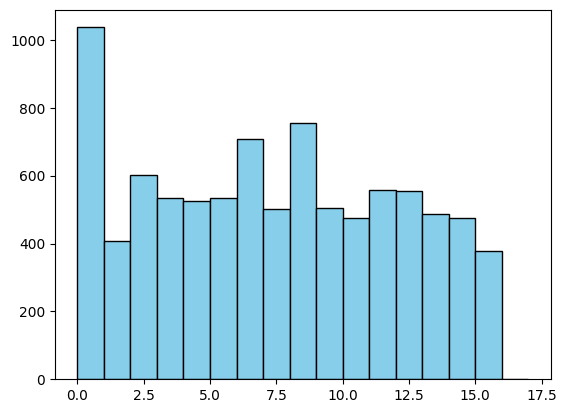

In [137]:
fig, ax = plt.subplots()

ax.hist(wgt_oz, bins=np.arange(0,17.5), edgecolor="black", color="skyblue")
plt.show()

As we can see, it is in fact a uniform distribution. But we can also see that *0 ounces* is more common. This is probably due to respondents rounding up the weight to an integer.

Let's look at the histogram of mothers' ages at the end of the birth.

In [138]:
mother_age = df["agepreg"]
mother_age.value_counts()

agepreg
22.75    100
21.75     92
20.00     91
18.83     90
21.25     90
        ... 
12.75      1
42.25      1
13.08      1
42.16      1
41.33      1
Name: count, Length: 373, dtype: int64

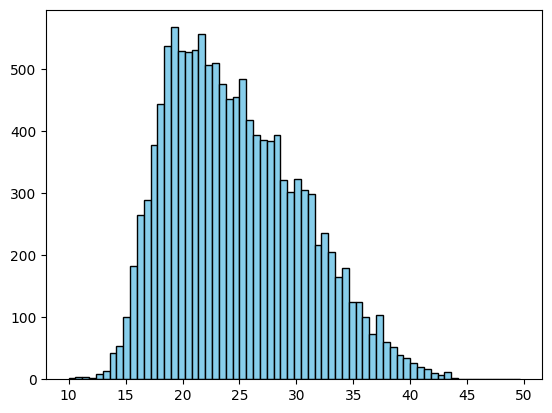

In [139]:
fig, ax = plt.subplots()

ax.hist(mother_age, bins=np.arange(10,50,0.6), edgecolor="black", color="skyblue")
plt.show()

It is roughly a normal distribution. But it is skewed to the right.

Let's look at the distribution of the length of the pregnancy.

In [140]:
preg_dur = df[df["outcome"] == 1]["prglngth"]
preg_dur.value_counts()

prglngth
39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
43     148
30     138
32     115
34      60
33      49
44      46
26      35
28      32
31      27
29      21
24      13
45      10
48       7
22       7
25       3
27       3
50       2
21       2
17       2
9        1
18       1
20       1
4        1
0        1
19       1
47       1
13       1
23       1
46       1
Name: count, dtype: int64

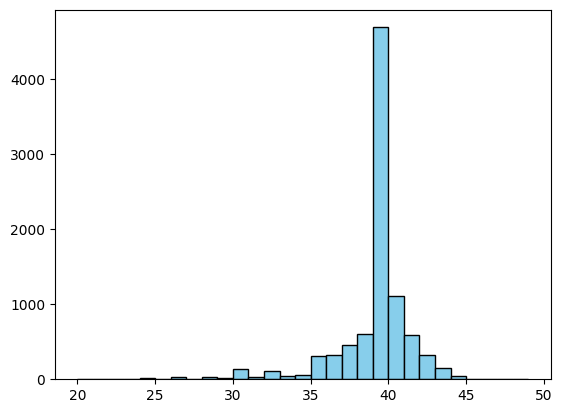

In [141]:
fig, ax = plt.subplots()
ax.hist(preg_dur, bins=np.arange(20,50), edgecolor="black", color="skyblue")
plt.show()

By far the most common quantity is 39 weeks. Which is roughly 9 months. Well, this is expected too.

Early babies are common, but doctors often intervene if it goes past 43 weeks.

## Outliers

Let's look at the outliers of these distributions.

In [142]:
preg_dur.value_counts().sort_index(ascending=True)

prglngth
0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64

- So looking at this frequency table, we can say that pregnancy lengths less than 10 weeks are probably errors since we are only evaluating live births.
- Lengths higher than 30 are probably legitimate.
- Between 10 and 30 weeks, it is hard to be sure. Some of the quantities are probably errors, but some are correctly recorded preterm babies.

In [143]:
preg_dur.value_counts().sort_index(ascending=False)

prglngth
50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
39    4693
38     607
37     455
36     321
35     311
34      60
33      49
32     115
31      27
30     138
29      21
28      32
27       3
26      35
25       3
24      13
23       1
22       7
21       2
20       1
19       1
18       1
17       2
13       1
9        1
4        1
0        1
Name: count, dtype: int64

We can interpert this outliers further, but best way to handle them is having "domain knowledge".

## First Babies

Let's compare the distribution of pregnancy lengths for first babies and others.

In [144]:
first = df[(df["outcome"] == 1) & (df["birthord"] == 1)]["prglngth"]
others = df[(df["outcome"] == 1) & (df["birthord"] != 1)]["prglngth"]

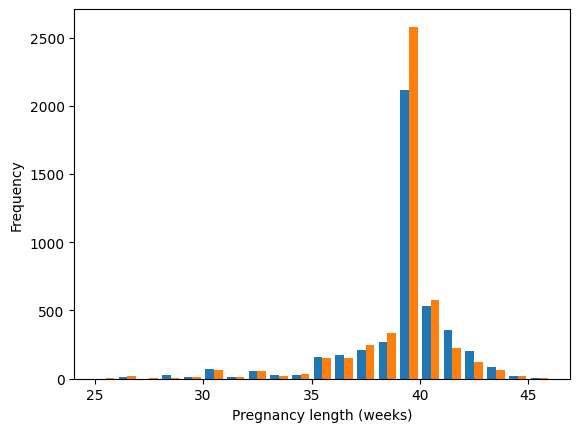

In [145]:
fig, ax = plt.subplots()
ax.hist([first, others], bins=np.arange(25,47))
ax.set_ylabel("Frequency")
ax.set_xlabel("Pregnancy length (weeks)")
plt.show()

This roughly shows us that there are more non-first babies born during week 39. But we shouldn't compare them directly.

Let's just comapre the means.

In [146]:
print(f"First {first.mean()}")
print(f"Others {others.mean()}")

First 38.60095173351461
Others 38.52291446673706


Difference is only 13 hours. We can't really say that the difference is significant.

There are several possible causes for this difference:
- There is an actual difference in pregnancy length between first babies and other babies.
- It is caused by some kind of bias in the sampling process.
- It is a measurement error.
- It is casued by random variation in the sampling process.

## Effect Size

Comparing the means is only effective if we are aware of the unit we use.

But to get e unit-less statistic, we can standardize the effect size. _Cohen's d_ is the most popular way of doing this:

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s}
$$

We can't use the standard deviation of one of the groups blindly. So we calculate the pooled standard deviation here with the below formula, basically finding the average standard deviation (for `ddof=1`):

$$
s_{pooled} = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}}
$$

In [147]:
var1, var2 = first.var(), others.var()
print(f"Variance (s^2) of the first babies: {var1}")
print(f"Variance (s^2) of the other babies: {var2}")

Variance (s^2) of the first babies: 7.794713509229203
Variance (s^2) of the other babies: 6.842683519298484


In [148]:
n1, n2 = first.count(), others.count()
print(f"Number of first babies: {n1}")
print(f"Number of other babies: {n2}")

Number of first babies: 4413
Number of other babies: 4735


In [149]:
from math import sqrt

s_pooled = sqrt(
    ((n1-1)*var1 + (n2-1)*var2)/(n1+n2-2)
)
print(f"s_pooled: {s_pooled}")

s_pooled: 2.7022101365417743


Now, we can find the differnece in the form of standard deviation.

In [150]:
diff = first.mean() - others.mean()
cohen_d = diff / s_pooled
cohen_d

np.float64(0.028879051899871784)

Difference is very small:
- **0.2** = small effect
- **0.5** = moderate effect
- **0.8** = large effect

## Exercises

In [151]:
from statadict import parse_stata_dict
fem_dict = parse_stata_dict('./data/2002FemResp.dct')
fem = pd.read_fwf('./data/2002FemResp.dat', names=fem_dict.names, colspecs=fem_dict.colspecs)

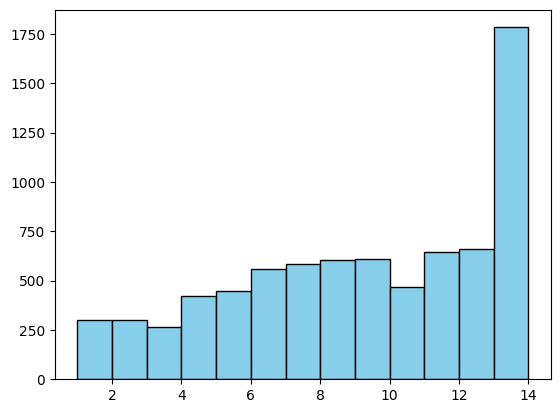

In [152]:
totinc = fem["totincr"]
fig, ax = plt.subplots()
ax.hist(totinc, color="skyblue", edgecolor="black", bins=np.arange(1,15))
plt.show()

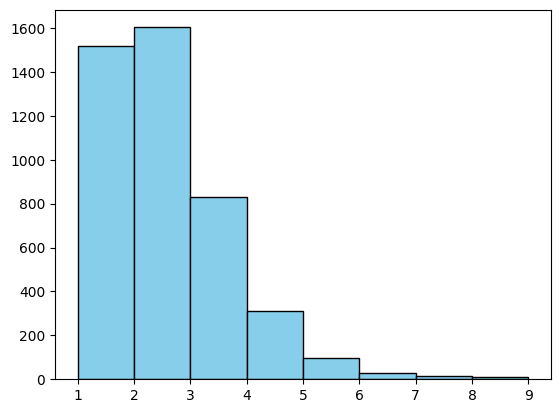

In [153]:
parity = fem["parity"]
fig, ax = plt.subplots()
ax.hist(parity, color="skyblue", edgecolor="black", bins=np.arange(1,10))
plt.show()

In [154]:
parity.value_counts().sort_index(ascending=False)

parity
22       1
16       1
10       3
9        2
8        8
7       15
6       29
5       95
4      309
3      828
2     1603
1     1519
0     3230
Name: count, dtype: int64

Maybe the woman with 22 childeren is an input error? Or is it just a rare case?

In [155]:
low_income_parity=fem[fem["totincr"].between(1,6, inclusive="both")]["parity"]
high_income_parity=fem[fem["totincr"].between(13,14, inclusive="both")]["parity"]

In [156]:
s_pooled = sqrt(
    ((low_income_parity.count() - 1) * low_income_parity.var() + (high_income_parity.count() - 1) * high_income_parity.var()) /
    (low_income_parity.count() + high_income_parity.count() - 2)
)

print(low_income_parity.std())
print(high_income_parity.std())
print(s_pooled)
print(f"Cohen's d for low income/high income difference: {(low_income_parity.mean() - high_income_parity.mean())/s_pooled}")

1.616823043678058
1.1787595071734456
1.4415911921255504
Cohen's d for low income/high income difference: 0.29160128183245015


We see that the effect of income on parity is small to moderate (in 2002!). Let's also see it on the histogram.

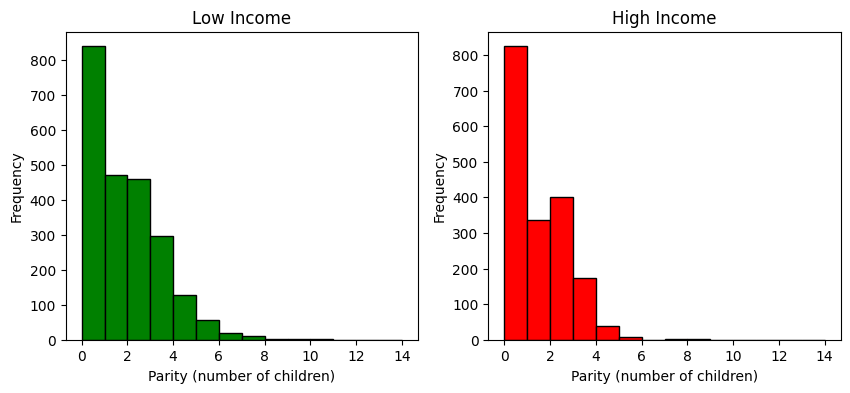

In [177]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].hist(low_income_parity, color="green",edgecolor="black", bins=np.arange(0,15))
axes[1].hist(high_income_parity, color="red",edgecolor="black",bins=np.arange(0,15))
axes[0].set_title("Low Income")
axes[1].set_title("High Income")

for ax in axes:
    ax.set_xlabel("Parity (number of children)")
    ax.set_ylabel("Frequency")